## Import the needed package

In [ ]:
import sys
sys.path.insert(0, "./../")

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

from utilities import make_datasets

## Extract the data

In [2]:
(train_raw, test_raw), info = tfds.load(
    "cifar10",
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

## Global Variable

In [3]:
BATCH_SIZE = 32
NUM_CLASSES = info.features['label'].num_classes
NAME_CLASSES = info.features['label'].names
TRAINSIZE = 10000
VALSIZE = 5000

## Data Preprocessing

In [4]:
trainset = make_datasets(train_raw.take(TRAINSIZE), training=True)
valset = make_datasets(test_raw.take(VALSIZE), training=False)
testset = make_datasets(test_raw.skip(VALSIZE), training=False)

## Training model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'),
])

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("./../model/model.h5", save_best_only=True, monitor="val_accuracy"),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True),
]

In [11]:
history = model.fit(
    trainset,
    epochs=25,
    validation_data=valset,
    callbacks=callbacks
)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.2921 - loss: 1.9727

313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 128ms/step - accuracy: 0.3442 - loss: 1.8132 - val_accuracy: 0.3414 - val_loss: 1.8155 - learning_rate: 0.0010
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4222 - loss: 1.5887

313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.4375 - loss: 1.5566 - val_accuracy: 0.3614 - val_loss: 1.7728 - learning_rate: 0.0010
Epoch 3/25
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4903 - loss: 1.4386

313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.4974 - loss: 1.4102 - val_accuracy: 0.4902 - val_loss: 1.4088 - learning_rate: 0.0010
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5272 - loss: 1.3308

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.5362 - loss: 1.2987 - val_accuracy: 0.5082 - val_loss: 1.4507 - learning_rate: 0.0010
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5592 - loss: 1.2207 

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step - accuracy: 0.5673 - loss: 1.2107 - val_accuracy: 0.5396 - val_loss: 1.4505 - learning_rate: 0.0010
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step - accuracy: 0.5854 - loss: 1.1495 - val_accuracy: 0.5392 - val_loss: 1.3045 - learning_rate: 0.0010
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6184 - loss: 1.0907

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - accuracy: 0.6232 - loss: 1.0750 - val_accuracy: 0.5768 - val_loss: 1.2048 - learning_rate: 0.0010
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 125ms/step - accuracy: 0.6415 - loss: 1.0191 - val_accuracy: 0.5754 - val_loss: 1.1822 - learning_rate: 0.0010
Epoch 9/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6537 - loss: 0.9889

313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.6519 - loss: 0.9851 - val_accuracy: 0.5888 - val_loss: 1.2325 - learning_rate: 0.0010
Epoch 10/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 145ms/step - accuracy: 0.6710 - loss: 0.9319 - val_accuracy: 0.5632 - val_loss: 1.2988 - learning_rate: 0.0010
Epoch 11/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6736 - loss: 0.9195

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.6795 - loss: 0.9049 - val_accuracy: 0.6486 - val_loss: 1.0197 - learning_rate: 0.0010
Epoch 12/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6950 - loss: 0.8739

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.6949 - loss: 0.8720 - val_accuracy: 0.6696 - val_loss: 0.9818 - learning_rate: 0.0010
Epoch 13/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 109ms/step - accuracy: 0.7128 - loss: 0.8205 - val_accuracy: 0.5996 - val_loss: 1.2120 - learning_rate: 0.0010
Epoch 14/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.7125 - loss: 0.8154 - val_accuracy: 0.5766 - val_loss: 1.5964 - learning_rate: 0.0010
Epoch 15/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7319 - loss: 0.7672

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.7245 - loss: 0.7784 - val_accuracy: 0.6818 - val_loss: 0.9383 - learning_rate: 0.0010
Epoch 16/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.7374 - loss: 0.7637 - val_accuracy: 0.6500 - val_loss: 1.0520 - learning_rate: 0.0010
Epoch 17/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.7498 - loss: 0.7130 - val_accuracy: 0.6546 - val_loss: 1.0798 - learning_rate: 0.0010
Epoch 18/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.7460 - loss: 0.7275 - val_accuracy: 0.6796 - val_loss: 0.9563 - learning_rate: 0.0010
Epoch 19/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.7806 - loss: 0.6249 - val_accuracy: 0.6776 - val_loss: 0.9634 - learning_rate: 5.0000e-04
Epoch 20/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.7825 - loss: 0.5986

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step - accuracy: 0.7833 - loss: 0.6036 - val_accuracy: 0.7040 - val_loss: 0.8916 - learning_rate: 5.0000e-04
Epoch 21/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.8033 - loss: 0.5729 - val_accuracy: 0.6986 - val_loss: 0.9412 - learning_rate: 5.0000e-04
Epoch 22/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8097 - loss: 0.5635

313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.8075 - loss: 0.5550 - val_accuracy: 0.7122 - val_loss: 0.8990 - learning_rate: 5.0000e-04
Epoch 23/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8097 - loss: 0.5467

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.8086 - loss: 0.5498 - val_accuracy: 0.7144 - val_loss: 0.8872 - learning_rate: 5.0000e-04
Epoch 24/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 107ms/step - accuracy: 0.8049 - loss: 0.5428 - val_accuracy: 0.7120 - val_loss: 0.8826 - learning_rate: 5.0000e-04
Epoch 25/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.8185 - loss: 0.5173 - val_accuracy: 0.6802 - val_loss: 1.0094 - learning_rate: 5.0000e-04


## Review the model performance

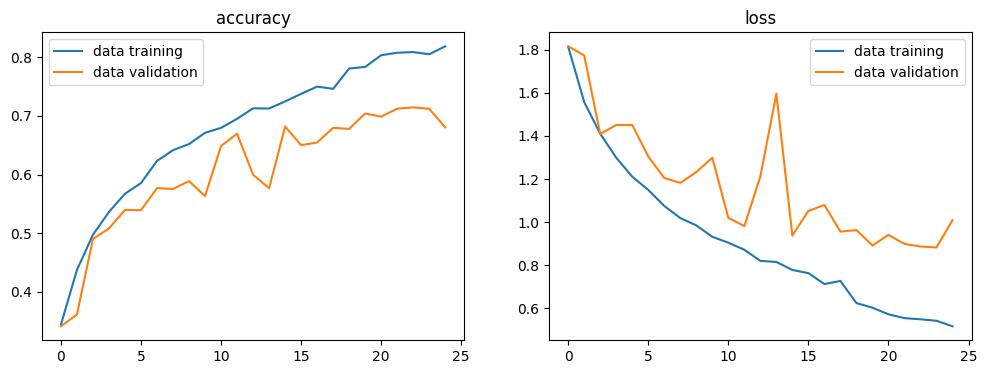

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2, 1)
plt.plot(history.history['accuracy'], label='data training')
plt.plot(history.history['val_accuracy'], label='data validation')
plt.title("accuracy")
plt.legend()

plt.subplot(1,2, 2)
plt.plot(history.history['loss'], label='data training')
plt.plot(history.history['val_loss'], label='data validation')
plt.title("loss")
plt.legend()

plt.show()